In [25]:
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules,fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import csv

In [26]:
with open('chess.dat', 'r') as file:
    dataset = csv.reader(file, delimiter=' ')
    for row in dataset:
        temp=[element for element in row]
        temp= temp[:-1]
        items.append(temp)

In [27]:
apc_times = list()
apc_elements = list()
minsupport =.6


In [28]:
while minsupport <=1:
    start = time.process_time()
    te = TransactionEncoder()
    te_ary = te.fit(items).transform(items)
    df = pd.DataFrame(te_ary, columns=te.columns_)
    result= apriori(df, min_support= minsupport, use_colnames=True)
    apc_elements.append(minsupport) 
    end = time.process_time()
    apc_times.append(end-start)
    print (result)
    print(f"Runtime of the program is {end - start}")
    minsupport+=.2

         support                                           itemsets
0       0.666145                                               (11)
1       0.633917                                               (15)
2       0.782228                                               (17)
3       0.619524                                               (19)
4       0.696183                                               (21)
...          ...                                                ...
254939  0.600125  (56, 29, 52, 40, 62, 36, 9, 5, 60, 58, 48, 34,...
254940  0.607009  (56, 29, 52, 7, 40, 62, 36, 9, 60, 58, 48, 34,...
254941  0.601377  (56, 29, 52, 7, 40, 62, 36, 9, 5, 60, 58, 34, ...
254942  0.611702  (56, 29, 42, 52, 7, 40, 62, 36, 5, 60, 58, 48,...
254943  0.635795  (56, 29, 52, 7, 40, 62, 36, 9, 5, 60, 58, 48, ...

[254944 rows x 2 columns]
Runtime of the program is 253.84375
       support                                  itemsets
0     0.894869                                      (25)
1     0

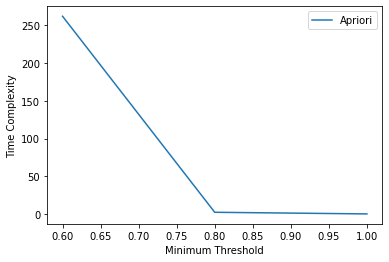

In [12]:
plt.xlabel('Minimum Threshold')
plt.ylabel('Time Complexity')
plt.plot(apc_elements, apc_times, label ='Apriori')
#plt.grid()
plt.legend()
#plt.savefig('AprioriChess.pdf',bbox_inches='tight')
plt.show()

In [13]:
items=[]
with open('chess.dat', 'r') as file:
    dataset = csv.reader(file, delimiter=' ')
    for row in dataset:
        temp=[element for element in row]
        items.append(temp)

In [14]:
fpc_times = list()
fpc_elements = list()
minsupport = .6


In [15]:
while minsupport <=1:
    start = time.process_time()
    te = TransactionEncoder()
    te_ary = te.fit(items).transform(items)
    df = pd.DataFrame(te_ary, columns=te.columns_)
    result= fpgrowth(df, min_support= minsupport, use_colnames=True)
    fpc_elements.append(minsupport)  
    end = time.process_time()
    fpc_times.append(end-start)
    print (result)
    print(f"Runtime of the program is {end - start}")
    minsupport+=.2

         support               itemsets
0       1.000000                     ()
1       0.999687                   (58)
2       0.996558                   (52)
3       0.995307                   (29)
4       0.991865                   (40)
...          ...                    ...
509884  0.600751     (, 50, 62, 40, 58)
509885  0.600751      (, 50, 7, 62, 58)
509886  0.600751      (, 50, 7, 40, 62)
509887  0.600751    (50, 7, 62, 40, 58)
509888  0.600751  (, 50, 7, 40, 62, 58)

[509889 rows x 2 columns]
Runtime of the program is 15.609375
        support                itemsets
0      1.000000                      ()
1      0.999687                    (58)
2      0.996558                    (52)
3      0.995307                    (29)
4      0.991865                    (40)
...         ...                     ...
16450  0.800688    (29, 44, 52, 40, 58)
16451  0.800688  (, 29, 44, 52, 40, 58)
16452  0.802566              (, 60, 44)
16453  0.802253            (60, 58, 44)
16454  0.802253  

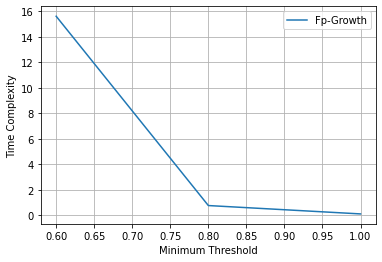

In [16]:
plt.xlabel('Minimum Threshold')
plt.ylabel('Time Complexity')
plt.plot(fpc_elements, fpc_times, label ='Fp-Growth')
plt.grid()
plt.legend()
plt.savefig('FpgrowthChess.pdf',bbox_inches='tight')
plt.show()

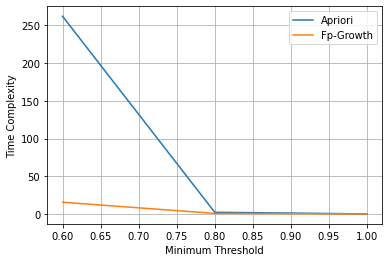

In [17]:
plt.xlabel('Minimum Threshold')
plt.ylabel('Time Complexity')
plt.plot(apc_elements, apc_times, label ='Apriori')
plt.plot(fpc_elements, fpc_times, label ='Fp-Growth')
plt.grid()
plt.legend()
plt.savefig('chesscombine.pdf',bbox_inches='tight')
plt.show()

In [29]:
data={"Apriori":apc_times,"Fp-Growth":fpc_times}
index = [0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95]
dataFrame = pd.DataFrame(data=data, index=index);

 
my_colors = ['lightseagreen','sandybrown']
# Draw a vertical bar chart

dataFrame.plot.bar(rot=15,color=my_colors);
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2))
plt.ylabel("Times Taken to Run The Algorithms")
plt.xlabel("Thresholds")
plt.savefig('Chess.pdf',bbox_inches='tight')

plt.show(block=True);

ValueError: Shape of passed values is (3, 2), indices imply (8, 2)